In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import os


def load_images_with_labels(train_image_path:str,train_label_path:str,test_images_path:str):
    
    train_images=np.load(train_image_path)
    train_labels=np.load(train_label_path)
    test_images=np.load(test_images_path)
    
    return train_images, train_labels, test_images


def split_train(train_images_full,train_labels,validation_size:int=0.2,random_state=42):
    
    return train_test_split(train_images_full,train_labels,test_size=validation_size,random_state=random_state)

TRAIN_IMAGE_PATH=os.path.join(os.curdir,"processed data","train_images.npy")
TRAIN_LABELS_PATH=os.path.join(os.curdir,"processed data","train_labels.npy")
TEST_IMAGE_PATH=os.path.join(os.curdir,"processed data","test_images.npy")

In [2]:
#Loading and splitting data

X_train_full,Y_full,X_test=load_images_with_labels(TRAIN_IMAGE_PATH,TRAIN_LABELS_PATH,TEST_IMAGE_PATH)
X_train,X_valid,y_train,y_valid=split_train(X_train_full,Y_full,validation_size=0.2,random_state=42)

print("Done!!!")

Done!!!


In [3]:
#Printing Shapes

print(f"Train set shape------->{X_train.shape}")
print(f"Train labels shape------->{y_train.shape}")
print(f"Validation set shape------->{X_valid.shape}")
print(f"Validation labels shape------->{y_valid.shape}")
print(f"Test set shape------->{X_test.shape}")

Train set shape------->(31367, 30, 30, 3)
Train labels shape------->(31367,)
Validation set shape------->(7842, 30, 30, 3)
Validation labels shape------->(7842,)
Test set shape------->(12630, 30, 30, 3)


In [10]:
#Model Structure

"""
The architecture of our model is:

2 Conv2D layer (filter=32, kernel_size=(5,5), activation=”relu”)

MaxPool2D layer ( pool_size=(2,2))

Dropout layer (rate=0.25)

2 Conv2D layer (filter=64, kernel_size=(3,3), activation=”relu”)

MaxPool2D layer ( pool_size=(2,2))

Dropout layer (rate=0.25)

Flatten layer to squeeze the layers into 1 dimension

Dense Fully connected layer (256 nodes, activation=”relu”)

Dropout layer (rate=0.5)

Dense layer (43 nodes, activation=”softmax”)


We will make our model using both Sequential and the Functional api of tensorflow

"""

'\nThe architecture of our model is:\n\n2 Conv2D layer (filter=32, kernel_size=(5,5), activation=”relu”)\n\nMaxPool2D layer ( pool_size=(2,2))\n\nDropout layer (rate=0.25)\n\n2 Conv2D layer (filter=64, kernel_size=(3,3), activation=”relu”)\n\nMaxPool2D layer ( pool_size=(2,2))\n\nDropout layer (rate=0.25)\n\nFlatten layer to squeeze the layers into 1 dimension\n\nDense Fully connected layer (256 nodes, activation=”relu”)\n\nDropout layer (rate=0.5)\n\nDense layer (43 nodes, activation=”softmax”)\n\n\nWe will make our model using both Sequential and the function api of tensorflow\n\n'

In [6]:
#Using the sequential api of tensorflow

def make_model_sequential()->keras.models.Model:
    
    model=keras.models.Sequential([
        keras.layers.Conv2D(filters=32,kernel_size=(5,5),activation="relu",input_shape=[30,30,3]),
        keras.layers.Conv2D(filters=32,kernel_size=(5,5),activation="relu"),
        keras.layers.MaxPool2D(pool_size=(2,2)),
        keras.layers.Dropout(rate=0.25),
        keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
        keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
        keras.layers.MaxPool2D(pool_size=(2,2)),
        keras.layers.Dropout(rate=0.25),
        keras.layers.Flatten(),
        keras.layers.Dense(units=256,activation="relu"),
        keras.layers.Dropout(rate=0.5),
        keras.layers.Dense(units=43,activation="softmax")
    ])
    
    return model

In [7]:
sequential_model=make_model_sequential()
sequential_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)         

In [11]:
#Using the sequential api of tensorflow

def make_model_functional()->keras.models.Model:
    
    inputs=keras.layers.Input(shape=[30,30,3])
    x=keras.layers.Conv2D(filters=32,kernel_size=(5,5),activation="relu",kernel_initializer="he_normal")(inputs)
    x=keras.layers.Conv2D(filters=32,kernel_size=(5,5),activation="relu",kernel_initializer="he_normal")(x)
    x=keras.layers.MaxPool2D(pool_size=(2,2))(x)
    x=keras.layers.Dropout(rate=0.25)(x)
    x=keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",kernel_initializer="he_normal")(x)
    x=keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",kernel_initializer="he_normal")(x)
    x=keras.layers.MaxPool2D(pool_size=(2,2))(x)
    x=keras.layers.Dropout(rate=0.25)(x)
    x=keras.layers.Flatten()(x)
    x=keras.layers.Dense(units=256,activation="relu",kernel_initializer="he_normal")(x)
    x=keras.layers.Dropout(rate=0.5)(x)
    outputs=keras.layers.Dense(units=43,activation="softmax")(x)
    
    model=keras.models.Model(inputs=[inputs],outputs=[outputs])
    
    return model

In [12]:
functional_model=make_model_functional()
functional_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 30, 30, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 64)         

In [69]:
#We will use the sequential_model for predictions

sequential_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [70]:
keras.backend.clear_session()
history=sequential_model.fit(X_train,y_train,batch_size=64,epochs=15,validation_data=(X_valid,y_valid))

Epoch 1/15
491/491 [==============================] - 55s 111ms/step - loss: 1.4814 - accuracy: 0.6035 - val_loss: 0.4894 - val_accuracy: 0.8822
Epoch 2/15
491/491 [==============================] - 57s 115ms/step - loss: 0.6193 - accuracy: 0.8181 - val_loss: 0.2550 - val_accuracy: 0.9302
Epoch 3/15
491/491 [==============================] - 57s 116ms/step - loss: 0.4182 - accuracy: 0.8746 - val_loss: 0.1293 - val_accuracy: 0.9647
Epoch 4/15
491/491 [==============================] - 53s 107ms/step - loss: 0.3357 - accuracy: 0.9002 - val_loss: 0.1336 - val_accuracy: 0.9642
Epoch 5/15
491/491 [==============================] - 52s 106ms/step - loss: 0.3044 - accuracy: 0.9096 - val_loss: 0.1252 - val_accuracy: 0.9694
Epoch 6/15
491/491 [==============================] - 56s 115ms/step - loss: 0.2580 - accuracy: 0.9237 - val_loss: 0.1088 - val_accuracy: 0.9693
Epoch 7/15
491/491 [==============================] - 59s 120ms/step - loss: 0.2310 - accuracy: 0.9304 - val_loss: 0.0778 - val_ac

In [ ]:
history=pd.DataFrame(history.history)

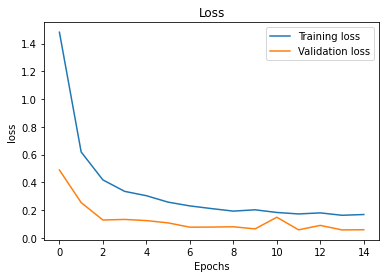

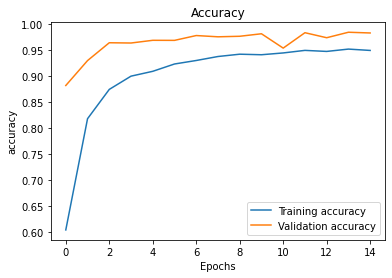

In [76]:
#Plotting the Graphs for accuracy and losses

plt.figure(0)
plt.plot(history["loss"],label="Training loss")
plt.plot(history["val_loss"],label="Validation loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()

plt.figure(1)
plt.plot(history["accuracy"],label="Training accuracy")
plt.plot(history["val_accuracy"],label="Validation accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()

plt.show()

In [77]:
sequential_model.save_weights("Initial_Model_weights.h5")